In [1]:
import numpy as np
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

### Add 2 scalars

In [2]:
a = tf.constant(5)
b = tf.constant(3)
c = tf.add(a, b)
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs/add_constants', sess.graph)
    r = sess.run(c)
    print('a + b = ', r)
writer.close()

a + b =  8


### Add name to tf ops

In [3]:
a = tf.constant([2, 2], name='a')
b = tf.constant([3, 6], name='b')
c = tf.add(a, b, name='add')
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs/add_named_constants', sess.graph)
    r = sess.run(c)
    print("a + b = ", sess.run(c))
writer.close()

a + b =  [5 8]


### Basic

In [4]:
a = tf.constant([3, 5], name='vector')
b = tf.constant([[2, 3, 1],
                 [4, 6, 2]], name='matrix')
with tf.Session() as sess:
    print("a : ", sess.run(a))
    print("b : ", b)

a :  [3 5]
b :  Tensor("matrix:0", shape=(2, 3), dtype=int32)


In [5]:
zeros = tf.zeros(shape=[3, 2], dtype=tf.int32)
with tf.Session() as sess:
    print(zeros)
    print(sess.run(zeros))

Tensor("zeros:0", shape=(3, 2), dtype=int32)
[[0 0]
 [0 0]
 [0 0]]


In [6]:
a = [[1, 2, 4], 
     [3, 4, 5]]
zeros = tf.zeros_like(a, dtype=tf.int32)
with tf.Session() as sess:
    print(zeros)
    print(sess.run(zeros))

Tensor("zeros_like:0", shape=(2, 3), dtype=int32)
[[0 0 0]
 [0 0 0]]


In [7]:
a = tf.fill([4, 5], 3.2)
with tf.Session() as sess:
    print(a)
    print(sess.run(a))

Tensor("Fill:0", shape=(4, 5), dtype=float32)
[[3.2 3.2 3.2 3.2 3.2]
 [3.2 3.2 3.2 3.2 3.2]
 [3.2 3.2 3.2 3.2 3.2]
 [3.2 3.2 3.2 3.2 3.2]]


In [8]:
x = tf.linspace(3.4, 5.5, 4)
with tf.Session() as sess:
    print(x)
    print (sess.run(x))

Tensor("LinSpace:0", shape=(4,), dtype=float32)
[3.4 4.1 4.8 5.5]


In [9]:
x = tf.range(3, 21, 3)
y = tf.reshape(tensor=x, shape=[3,2])
with tf.Session() as sess:
    print("x")
    print(x)
    print(sess.run(x))
    print("y")
    print(y)
    print(sess.run(y))

x
Tensor("range:0", shape=(6,), dtype=int32)
[ 3  6  9 12 15 18]
y
Tensor("Reshape:0", shape=(3, 2), dtype=int32)
[[ 3  6]
 [ 9 12]
 [15 18]]


x_normal :  Tensor("random_normal:0", shape=(1000,), dtype=float32)
x_truncated :  Tensor("truncated_normal:0", shape=(1000,), dtype=float32)


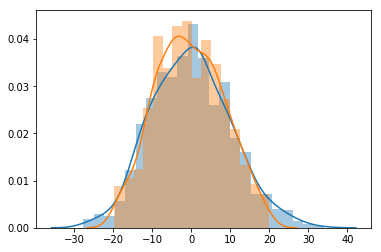

In [10]:
x_normal = tf.random_normal(mean=0, stddev=10, seed=42, shape=(1000,))
x_truncated = tf.truncated_normal(mean=0, stddev=10, seed=42, shape=(1000,))
with tf.Session() as sess:
    print("x_normal : ", x_normal)
    print("x_truncated : ", x_truncated)
    xs_normal = sess.run(x_normal)
    xs_truncated = sess.run(x_truncated)

    
    sns.distplot(xs_normal)
    sns.distplot(xs_truncated)

Tensor("random_uniform:0", shape=(100000,), dtype=float32)


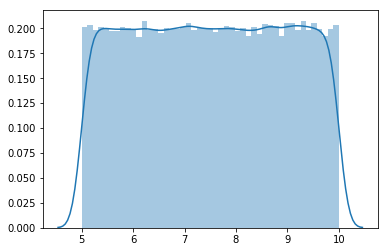

In [11]:
x_uniform = tf.random_uniform(minval=5, maxval=10, seed=42, shape=(100000,))
with tf.Session() as sess:
    print(x_uniform)
    xs = sess.run(x_uniform)
    sns.distplot(xs)

Tensor("random_poisson/RandomPoissonV2:0", shape=(100000,), dtype=float32)


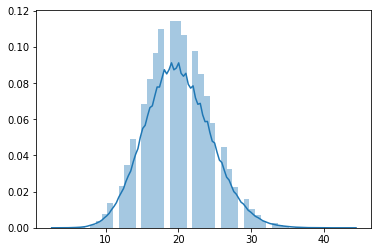

In [12]:
x_uniform = tf.random_poisson(lam=20, seed=42, shape=(100000,))
with tf.Session() as sess:
    print(x_uniform)
    xs = sess.run(x_uniform)
    sns.distplot(xs)

### Math operators

In [13]:
a = tf.constant([2, 4])
b = tf.constant([3, 5])

with tf.Session() as sess:
    print("a + b = ", sess.run(tf.add(a, b)))
    print("a - b = ", sess.run(tf.subtract(b, a)))
    print("a * b = ", sess.run(tf.multiply(a, b)))
    print("a · b = ", sess.run(tf.matmul(tf.reshape(a, [1, 2]), tf.reshape(b, [2,1]))))

a + b =  [5 9]
a - b =  [1 1]
a * b =  [ 6 20]
a · b =  [[26]]


In [14]:
a = tf.constant([[4, 2, 6],
                [2, 6, 7]])

b = tf.constant([[2, 4, 5]])

e = tf.constant([[1], 
                [4],
                 [5]])

c = tf.constant([1,2,3])

d = tf.constant(5)

with tf.Session() as sess:
    print(a)
    print(b)
    print(e)
    print(c)
    print(d)
    print(sess.run(tf.matmul(a, tf.transpose(b))))

Tensor("Const_4:0", shape=(2, 3), dtype=int32)
Tensor("Const_5:0", shape=(1, 3), dtype=int32)
Tensor("Const_6:0", shape=(3, 1), dtype=int32)
Tensor("Const_7:0", shape=(3,), dtype=int32)
Tensor("Const_8:0", shape=(), dtype=int32)
[[46]
 [63]]


### Variable

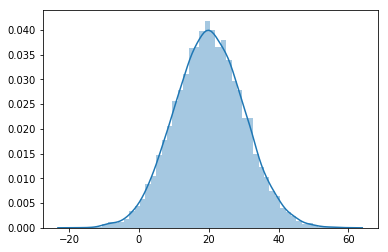

In [15]:
a = tf.Variable(2, name='scalar')
b = tf.Variable([3, 4], name='vector')
c = tf.Variable([[2,3],
                 [1,2]], name='matrix')
w = tf.Variable(tf.random_normal(mean=20, stddev=10, seed=42, shape=(10000,)))

with tf.Session() as sess:
    sess.run(tf.variables_initializer(var_list=[w]))
    ws = w.eval()
    sns.distplot(ws)

In [16]:
w = tf.Variable(10)
w_assign = w.assign(100)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("w before run assign operator : ",w.eval())
    sess.run(w_assign)
    print("w after run assign operator : ", w.eval())

w before run assign operator :  10
w after run assign operator :  100


In [17]:
a = tf.Variable(2)
assign = a.assign(a*2)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(assign))
    print(sess.run(assign))
    print(sess.run(assign))

4
8
16


In [18]:
w = tf.Variable(10)

sess1 = tf.Session()
sess2 = tf.Session()
sess1.run(w.initializer)
sess2.run(w.initializer)

print("w in sess1 : ", sess1.run(w.assign_add(5)))
print("w in sess2 : ", sess2.run(w.assign_sub(6)))

sess1.close()
sess2.close()

w in sess1 :  15
w in sess2 :  4


### Placeholder

In [19]:
X = tf.placeholder(tf.float32, shape=())
Y = tf.placeholder(tf.float32, shape=())

Z = X*2 + Y

with tf.Session() as sess:
    print("X = 5, Y = 2 : Z = ", sess.run(Z, { X:5, Y:2 }))
    print("X = 10, Y = -5 : Z = ", sess.run(Z, { X:10.1, Y:-5 }))

X = 5, Y = 2 : Z =  12.0
X = 10, Y = -5 : Z =  15.200001


In [22]:
X = tf.placeholder(tf.float32, shape=[3, 2])
W = tf.Variable([[3.0], 
                 [3.0]])
Z = tf.matmul(X, W)

d = {
    X : [[3,2],
        [2,4],
        [1, 5]]
}
with tf.Session() as sess:
    sess.run(W.initializer)
    print(sess.run(Z, d))

[[15.]
 [18.]
 [18.]]


In [53]:
X = tf.placeholder(tf.float32, shape=[None, 3])
W = tf.Variable(tf.random_normal(dtype=tf.float32, seed=42, mean=5, stddev=10,shape=[3,1]))
Z = tf.matmul(X, W)

d = {
    X : [[1,2,3],
        [4,5,6],
        [4,5,6],
        [4,5,6],]
}

d2 = {
    X : [[5, 4, 2],
        [1, 7, 9]]
}

d_list = [d, d2]
with tf.Session() as sess:
    sess.run(W.initializer)
    for i, d in enumerate(d_list):
        print (i)
        print(sess.run(Z, d))

0
[[ 4.147319]
 [16.301615]
 [16.301615]
 [16.301615]]
1
[[21.92457 ]
 [11.679937]]


In [65]:
X = tf.placeholder(dtype=tf.float32, shape=[2, 3])
d = {
    X : [[1,2,3],
        [4,5,6]]
}
with tf.Session() as sess:
    print(sess.run(X, d).shape)

(2, 3)
